# CRP MCMC inference
Adapted from Tamara Broderick's code on https://github.com/tbroderick/bnp_tutorial

Extended to concentration parameter inference using algorithm in West (1992) using Gamma(2,4) prior.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import asyncio
from crp_mcmc import GaussianMixture, CRPGibbs, DPMM
from plots import confidence_ellipse, colors, plot_clusters

## Define Gaussian Mixture to create clustered data

In [ ]:
%matplotlib inline

In [2]:
sd = [np.array([[0.8, 0.5], [0.5, 0.8]]), np.array([[1.2, -0.5], [-0.5, 1.2]]), np.array([[0.5, 0.1], [0.1, 0.5]]), np.array([[1, 0.0], [0.0, 1]])]
gm = GaussianMixture(sd, [0.3, 0.4, 0.2, 0.1]) # define Gaussian mixture with sd=1 and given frequencies
data= gm.rvs(200) # create 1000 data points

## Run fast numba implementation of the MCMC Gibbs sampler

In [3]:
dpmm = DPMM(data)

### $\alpha$ constant, known/set covariance

In [4]:
%%time
dpmm.run_mcmc("normal", iter=2000, alpha=1, sig0=20, sd=1)

Wall time: 23.7 s


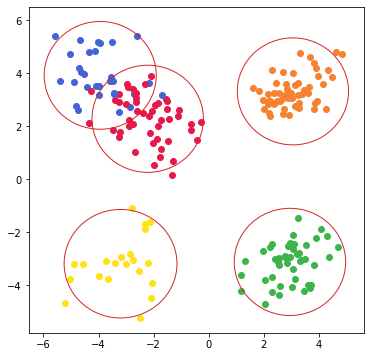

In [5]:
fix, ax = plt.subplots(figsize=(6, 6))
plot_clusters(data, dpmm, ax)

### $\alpha$ constant, unknown covariance - normal-inverse Wishart

In [20]:
%%time
dpmm.run_mcmc("normal_invwishart", iter=2000, alpha=1, sig0=2, kappa_0=0.1)

Wall time: 53.3 s


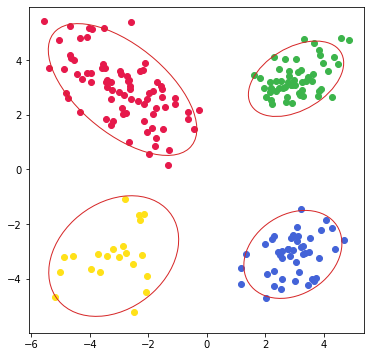

In [21]:
fix, ax = plt.subplots(figsize=(6, 6))
plot_clusters(data, dpmm, ax)

### $\alpha$ inferred, known/set covariance

In [8]:
%%time
dpmm.run_mcmc("normal", iter=2000, sig0=20, sd=1)

Wall time: 17.2 s


In [9]:
dpmm.alphas[500:].mean()

0.6711154951379209

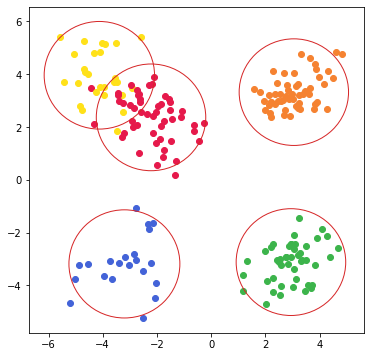

In [10]:
fix, ax = plt.subplots(figsize=(6, 6))
plot_clusters(data, dpmm, ax)

### $\alpha$ inferred, unknown covariance - normal-inverse Wishart

In [17]:
%%time
dpmm.run_mcmc("normal_invwishart", iter=2000, sig0=2, kappa_0=0.1)

Wall time: 51.7 s


In [18]:
dpmm.alphas[500:].mean()

0.586327310625857

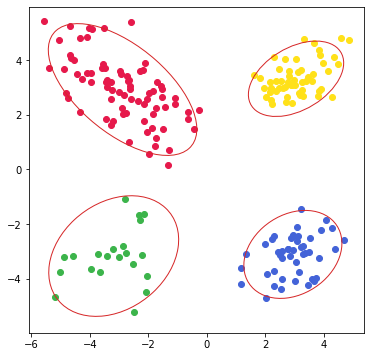

In [19]:
fix, ax = plt.subplots(figsize=(6, 6))
plot_clusters(data, dpmm, ax)

## 9 clusters

In [14]:
gm = GaussianMixture(1, [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], mu=np.array([[6, 6], [6, 0], [6, -6], [0, -6], [0, 0], [0, 6], [-6, 6], [-6, 0], [-6, -6]]))
data = gm.rvs(1000) # create 1000 data points
dpmm = DPMM(data)

### $\alpha$ constant

In [15]:
%%time
dpmm.run_mcmc("normal", iter=1000, alpha=1, sig0=20, sd=1)

Wall time: 1min 30s


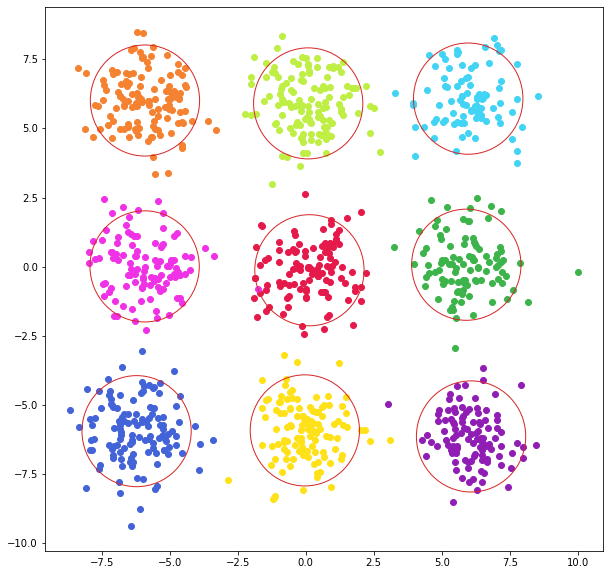

In [16]:
fix, ax = plt.subplots(figsize=(10, 10))
plot_clusters(data, dpmm, ax)

### $\alpha$ inferred with 9 clusters

In [17]:
%%time
dpmm.run_mcmc("normal", iter=1000, sig0=20, sd=1)

Wall time: 1min 29s


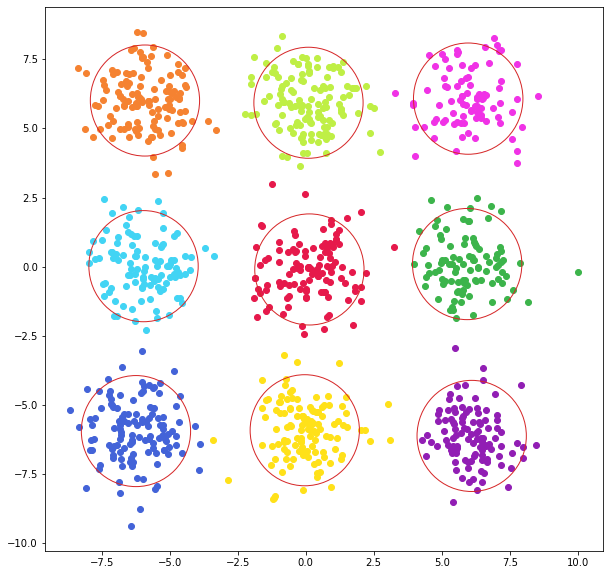

In [19]:
fix, ax = plt.subplots(figsize=(10, 10))
plot_clusters(data, dpmm, ax)

## Live animation
Watch the clustering process live

In [2]:
%matplotlib widget

In [7]:
gm = GaussianMixture(1, [0.4, 0.3, 0.2, 0.1])
data= gm.rvs(100)
gb = CRPGibbs(data, 1)

In [8]:
fig = plt.figure()
loop = asyncio.get_event_loop()
loop.create_task(gb.run_live(0.01, 100, True, fig=fig));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …